In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("Titanic.csv")

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


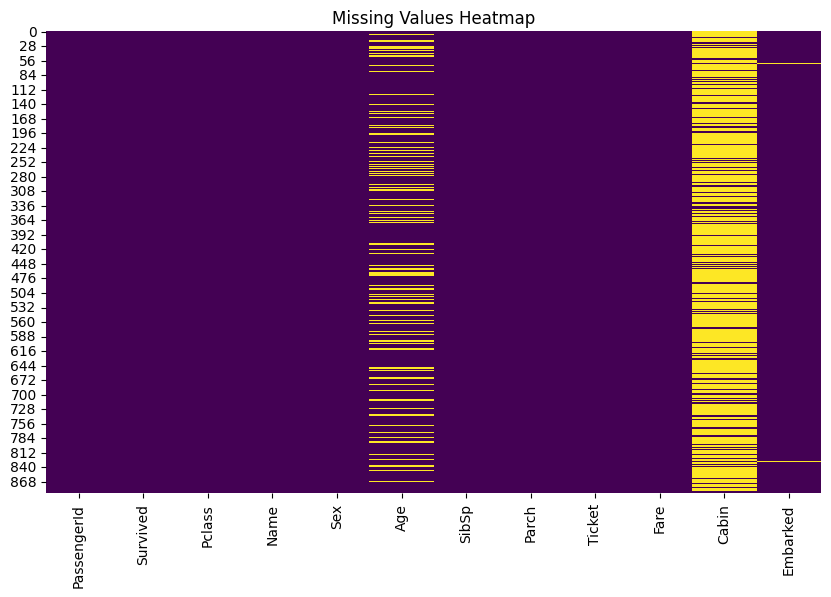

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
# For checking null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Create missing-value flags
df['Age_Missing'] = df['Age'].isnull().astype(int)
df['Embarked_Missing'] = df['Embarked'].isnull().astype(int)

# Drop Cabin
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Impute missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('S')

# Confirm no missing values remain
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


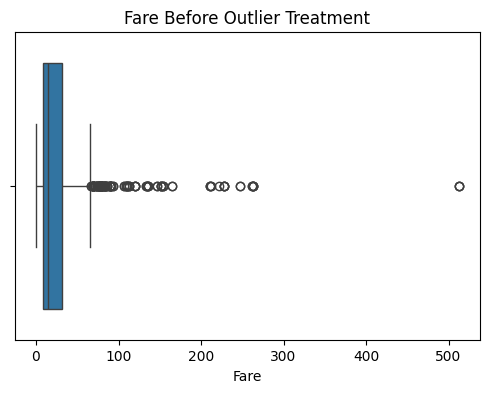

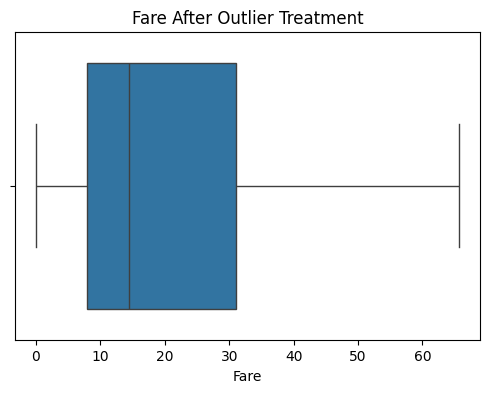

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before-treatment boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Before Outlier Treatment")
plt.show()

# IQR method to detect boundaries
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Fare'] = df['Fare'].clip(lower=lower_bound, upper=upper_bound)

# After-treatment boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare After Outlier Treatment")
plt.show()


In [8]:
# Save cleaned dataset
df.to_csv("clean_v1.csv", index=False)

# Save decision_log.md
decision_log = """
# Decision Log

## Missing Data
- Age: Imputed with mean value. Created `Age_Missing` flag.
- Embarked: Imputed with most common value 'S'. Created `Embarked_Missing` flag.
- Cabin: Dropped (too many missing values).

## Outlier Treatment
- Fare: Outliers detected using IQR method. Winsorized (capped at upper bound).

## Reproducibility
Order of steps:
1. Load Titanic.csv
2. EDA (.info, .describe, NA heatmap)
3. Handle missing values (flags, drop Cabin, impute)
4. Treat Fare outliers (IQR + capping)
5. Save outputs (CSV + docs)
"""

with open("decision_log.md", "w") as f:
    f.write(decision_log)

# Save data_card.md
data_card = """
# Data Card – Titanic Dataset (Cleaned Version)

**Dataset Name:** Titanic.csv → clean_v1.csv
**Version:** v1
**Date:** 2025-08-17
**Source:** Lab assignment dataset

## Overview
This dataset contains Titanic passenger information: demographics, ticket details, and survival outcomes.

## Preprocessing Summary
- All missing values handled
- Outliers in Fare capped
- Missing-value flags added
- Cabin column dropped

## Visualizations
- NA Heatmap (before cleaning)
- Fare Distribution (before & after outlier treatment)

*(Plots saved in Colab outputs, can be re-run to regenerate)*
"""

with open("data_card.md", "w") as f:
    f.write(data_card)

print("✅ Files saved: clean_v1.csv, decision_log.md, data_card.md")


✅ Files saved: clean_v1.csv, decision_log.md, data_card.md


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# NA heatmap before cleaning
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("NA Heatmap (After Cleaning)")
plt.savefig("na_heatmap.png")
plt.close()

# Fare before cleaning (we need original for comparison, so reload raw data)
raw_df = pd.read_csv("Titanic.csv")

plt.figure(figsize=(6,4))
sns.boxplot(x=raw_df['Fare'])
plt.title("Fare Before Outlier Treatment")
plt.savefig("fare_before.png")
plt.close()

# Fare after cleaning
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare After Outlier Treatment")
plt.savefig("fare_after.png")
plt.close()

# Save cleaned CSV
df.to_csv("clean_v1.csv", index=False)

# Save decision_log.md
decision_log = """
# Decision Log

## Missing Data
- Age: Imputed with mean value. Created `Age_Missing` flag.
- Embarked: Imputed with most common value 'S'. Created `Embarked_Missing` flag.
- Cabin: Dropped (too many missing values).

## Outlier Treatment
- Fare: Outliers detected using IQR method. Winsorized (capped at upper bound).

## Reproducibility
Steps in order:
1. Load Titanic.csv
2. EDA (.info, .describe, NA heatmap)
3. Handle missing values (flags, drop Cabin, impute)
4. Treat Fare outliers (IQR + capping)
5. Save outputs (CSV + docs)
"""
with open("decision_log.md", "w") as f:
    f.write(decision_log)

#  Save data_card.md with embedded plots
data_card = """
# Data Card – Titanic Dataset (Cleaned Version)

**Dataset Name:** Titanic.csv → clean_v1.csv
**Version:** v1
**Date:** 2025-08-17
**Source:** Lab assignment dataset

---

## Overview
The dataset contains information on Titanic passengers: demographics, tickets, survival status.

## Preprocessing Summary
- All missing values handled
- Outliers in Fare capped
- Missing-value flags added
- Cabin column dropped

---

## Visuals

### NA Heatmap (Before Cleaning)
![NA Heatmap](na_heatmap.png)

### Fare Distribution Before Outlier Treatment
![Fare Before](fare_before.png)

### Fare Distribution After Outlier Treatment
![Fare After](fare_after.png)
"""
with open("data_card.md", "w") as f:
    f.write(data_card)

print("✅ Files saved: clean_v1.csv, decision_log.md, data_card.md, with plots attached")


✅ Files saved: clean_v1.csv, decision_log.md, data_card.md, with plots attached
